In [1]:
import numpy as np
import pandas as pd
#Importing libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold,cross_val_score
from imblearn.ensemble import BalancedRandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

Using TensorFlow backend.


In [2]:
#SMOTE for over sampling
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [3]:
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

In [4]:
current_month_1=pd.read_csv('nov_18.csv',header=None)

C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (67,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
current_month_1.shape

(2853787, 144)

In [6]:
previous_month_1=pd.read_csv('month_summ.csv',header=None)
#previous_month_2=pd.read_csv('month_summ.csv',header=None)
churners_current_month=pd.read_csv('churn_november.csv',header=None)
nonchurners_current_month=pd.read_csv('nonchurn_november.csv',header=None)                  

In [7]:
def preprocess_df_current_month(df_current_month,c,nc,todays_date):
    #Column_Rename
    df_current_month.columns=["msisdn",
                    "month_year",
                    "month",
                    "dist_voc_days",
                    "dist_sms_days",
                    "dist_data_days",
                    "dist_vas_days",
                    "all_tot_charge",
                    "sms_cnt",
                    "voc_cnt",
                    "vas_cnt",
                    "data_tot_upl_mb",
                    "data_tot_downl_mb",
                    "data_tot_usage_mb",
                    "sms_charge",
                    "voc_charge",
                    "voc_onnet_charge",
                    "voc_intl_charge",
                    "voc_safari_charge",
                    "voc_offnet_charge",
                    "data_charge_kes",
                    "vas_charge_kes",
                    "voc_tot_dur",
                    "voc_cnt_onnnet",
                    "voc_dur_onnet",
                    "voc_cnt_safari",
                    "voc_dur_safari",
                    "voc_cnt_airtel",
                    "voc_dur_airtel",
                    "voc_cnt_intl",
                    "voc_dur_intl",
                    "voc_dur_offnet",
                    "tot_bill_amount",
                    "tot_credit",
                    "night_all_tot_charge",
                    "night_sms_cnt",
                    "night_voc_cnt",
                    "night_voc_tot_dur",
                    "night_vas_cnt",
                    "night_data_tot_mb",
                    "night_data_tot_upl_mb",
                    "night_data_tot_downl_mb",
                    "night_sms_charge",
                    "night_voc_charge",
                    "night_data_charge",
                    "night_vas_charge",
                    "night_voc_onnet_charge",
                    "night_voc_intl_charge",
                    "night_voc_offnet_charge",
                    "night_voc_dur_intl",
                    "night_voc_dur_onnet",
                    "night_voc_dur_offnet",
                    "night_data_per",
                    "night_voc_per",
                    "bundle_revenue_data",
                    "bundle_revenue_voice_sms",
                    "bundle_revenue_internati",
                    "edr_revenue",
                    "pewa_borrow_charge",
                    "pewa_reimb_charge",
                    "pewa_revenue",
                    "intl_usage_fl",
                    "night_usage_fl",
                    "is_4g4free",
                    "is_pewa",
                    "is_not_pewa",
                    "age",
                    "age_grp",
                    "gender",
                    "cust_town",
                    "voc_equitel_charge",
                    "voc_airtel_charge",
                    "payg_voc_dur_intl",
                    "bundle_voc_dur_intl",
                    "amkia_data_usage",
                    "preloaded_data_usage",
                    "payg_shortcode_revenue",
                    "sms_airtel_charge",
                    "sms_safari_charge",
                    "sms_equitel_charge",
                    "sms_offnet_charge",
                    "sms_onnet_charge",
                    "sms_intl_charge",
                    "night_voc_usage_fl",
                    "night_data_usage_fl",
                    "data_cost",
                    "voc_onnet_cost",
                    "voc_offnet_cost",
                    "sms_cost",
                    "voc_intl_cost",
                    "total_cost",
                    "total_revenue",
                    "margin",
                    "data_level",
                    "revenue_level",
                    "voice_level",
                    "margin_level",
                    "nationality",
                    "bundle_1_freq_nm",
                    "bundle_1_freq_cnt",
                    "bundle_1_freq_shr",
                    "bundle_2_freq_nm",
                    "bundle_2_freq_cnt",
                    "bundle_2_freq_shr",
                    "bundle_tot_freq_cnt",
                    "bundle_1_rev_nm",
                    "bundle_1_rev_val",
                    "bundle_1_rev_shr",
                    "bundle_2_rev_nm",
                    "bundle_2_rev_val",
                    "bundle_2_rev_shr",
                    "bundle_tot_rev_val",
                    "data_user_fl",
                    "data_support_type",
                    "homing_longitude",
                    "homing_latitude",
                    "homing_commercial_region",
                    "homing_sales_area",
                    "homing_site_name",
                    "homing_site_id",
                    "homing_site_data_type",
                    "brand",
                    "product_line",
                    "network_type",
                    "activation_date",
                    "activation_month",
                    "activation_year",
                    "activation_partdate",
                    "site_cluster",
                    "sales_metros",
                    "town",
                    "cluster_type",
                    "voice_intl_bndl_rev",
                    "sms_bndl_rev",
                    "voice_bndl_rev",
                    "freedom_offer_bndl_rev",
                    "whats_app_bndl_rev",
                    "home_bndl_rev",
                    "facebook_bila_net_rev",
                    "mobile_data_bndl_tk_rev",
                    "pewa_comm_rev",
                    "other_bndl_rev",
                    "home_ultd_data_usage",
                    "home_bdl_data_usage"]
    #Renaming churners column
    c.columns=['msisdn']
    
    #Merging columns of churners
    df_churners=pd.merge(df_current_month[['msisdn','activation_partdate','dist_voc_days','dist_data_days','data_tot_usage_mb','data_charge_kes','edr_revenue','total_revenue','voc_tot_dur','revenue_level','homing_site_data_type','data_support_type']],c,how='inner',on='msisdn')
    df_churners['status']=0
    df_churners.columns=['msisdn','activation_partdate','dist_voc_days_current_month','dist_data_days_current_month','data_tot_usage_mb_current_month','data_charge_kes_current_month','edr_revenue_current_month','total_revenue_current_month','voc_tot_dur_current_month','revenue_level_current_month','homing_site_data_type','data_support_type','status']
    
    #Renaming nonchurners column
    nc.columns=['msisdn']
    
    #Merging columns pf nonchurners
    df_nonchurners=pd.merge(df_current_month[['msisdn','activation_partdate','dist_voc_days','dist_data_days','data_tot_usage_mb','data_charge_kes','edr_revenue','total_revenue','voc_tot_dur','revenue_level','homing_site_data_type','data_support_type']],nc,how='inner',on='msisdn')
    df_nonchurners['status']=1
    df_nonchurners.columns=['msisdn','activation_partdate','dist_voc_days_current_month','dist_data_days_current_month','data_tot_usage_mb_current_month','data_charge_kes_current_month','edr_revenue_current_month','total_revenue_current_month','voc_tot_dur_current_month','revenue_level_current_month','homing_site_data_type','data_support_type','status']
    
    #Appending dataframes
    df_new=df_churners.append(df_nonchurners)
    df_new=df_new.sample(n=len(df_new),random_state=123)
    #df_new.columns=['msisdn','activation_partdate','dist_voc_days_current_month','dist_data_days_current_month','data_tot_usage_mb_current_month','data_charge_kes_current_month','edr_revenue_current_month','total_revenue_current_month','voc_tot_dur_current_month','revenue_level_current_month']
    
    
    #Creating age on network
    df_new['current_date']=todays_date
    df_new['current_date']=pd.to_datetime(df_new['current_date'],format='%Y%m%d')
    df_new['activation_partdate']=pd.to_datetime(df_new['activation_partdate'], format='%Y%m%d')
    df_new['AON_months']=df_new['current_date'] - df_new['activation_partdate']
    df_new['AON_months']=round(df_new['AON_months']/np.timedelta64(1,'M'))
    df_new['AON_months'].fillna(value=0,inplace=True)
    df_new.drop(['current_date','activation_partdate'],axis=1,inplace=True)
      
    return df_new

In [8]:
def preprocess_previous_month(df_previous_month,df_current_month_preprocessed,c,nc):
    
    df_previous_month.columns=["msisdn",
                    "month_year",
                    "month",
                    "dist_voc_days",
                    "dist_sms_days",
                    "dist_data_days",
                    "dist_vas_days",
                    "all_tot_charge",
                    "sms_cnt",
                    "voc_cnt",
                    "vas_cnt",
                    "data_tot_upl_mb",
                    "data_tot_downl_mb",
                    "data_tot_usage_mb",
                    "sms_charge",
                    "voc_charge",
                    "voc_onnet_charge",
                    "voc_intl_charge",
                    "voc_safari_charge",
                    "voc_offnet_charge",
                    "data_charge_kes",
                    "vas_charge_kes",
                    "voc_tot_dur",
                    "voc_cnt_onnnet",
                    "voc_dur_onnet",
                    "voc_cnt_safari",
                    "voc_dur_safari",
                    "voc_cnt_airtel",
                    "voc_dur_airtel",
                    "voc_cnt_intl",
                    "voc_dur_intl",
                    "voc_dur_offnet",
                    "tot_bill_amount",
                    "tot_credit",
                    "night_all_tot_charge",
                    "night_sms_cnt",
                    "night_voc_cnt",
                    "night_voc_tot_dur",
                    "night_vas_cnt",
                    "night_data_tot_mb",
                    "night_data_tot_upl_mb",
                    "night_data_tot_downl_mb",
                    "night_sms_charge",
                    "night_voc_charge",
                    "night_data_charge",
                    "night_vas_charge",
                    "night_voc_onnet_charge",
                    "night_voc_intl_charge",
                    "night_voc_offnet_charge",
                    "night_voc_dur_intl",
                    "night_voc_dur_onnet",
                    "night_voc_dur_offnet",
                    "night_data_per",
                    "night_voc_per",
                    "bundle_revenue_data",
                    "bundle_revenue_voice_sms",
                    "bundle_revenue_internati",
                    "edr_revenue",
                    "pewa_borrow_charge",
                    "pewa_reimb_charge",
                    "pewa_revenue",
                    "intl_usage_fl",
                    "night_usage_fl",
                    "is_4g4free",
                    "is_pewa",
                    "is_not_pewa",
                    "age",
                    "age_grp",
                    "gender",
                    "cust_town",
                    "voc_equitel_charge",
                    "voc_airtel_charge",
                    "payg_voc_dur_intl",
                    "bundle_voc_dur_intl",
                    "amkia_data_usage",
                    "preloaded_data_usage",
                    "payg_shortcode_revenue",
                    "sms_airtel_charge",
                    "sms_safari_charge",
                    "sms_equitel_charge",
                    "sms_offnet_charge",
                    "sms_onnet_charge",
                    "sms_intl_charge",
                    "night_voc_usage_fl",
                    "night_data_usage_fl",
                    "data_cost",
                    "voc_onnet_cost",
                    "voc_offnet_cost",
                    "sms_cost",
                    "voc_intl_cost",
                    "total_cost",
                    "total_revenue",
                    "margin",
                    "data_level",
                    "revenue_level",
                    "voice_level",
                    "margin_level",
                    "nationality",
                    "bundle_1_freq_nm",
                    "bundle_1_freq_cnt",
                    "bundle_1_freq_shr",
                    "bundle_2_freq_nm",
                    "bundle_2_freq_cnt",
                    "bundle_2_freq_shr",
                    "bundle_tot_freq_cnt",
                    "bundle_1_rev_nm",
                    "bundle_1_rev_val",
                    "bundle_1_rev_shr",
                    "bundle_2_rev_nm",
                    "bundle_2_rev_val",
                    "bundle_2_rev_shr",
                    "bundle_tot_rev_val",
                    "data_user_fl",
                    "data_support_type",
                    "homing_longitude",
                    "homing_latitude",
                    "homing_commercial_region",
                    "homing_sales_area",
                    "homing_site_name",
                    "homing_site_id",
                    "homing_site_data_type",
                    "brand",
                    "product_line",
                    "network_type",
                    "activation_date",
                    "activation_month",
                    "activation_year",
                    "activation_partdate",
                    "site_cluster",
                    "sales_metros",
                    "town",
                    "cluster_type",
                    "voice_intl_bndl_rev",
                    "sms_bndl_rev",
                    "voice_bndl_rev",
                    "freedom_offer_bndl_rev",
                    "whats_app_bndl_rev",
                    "home_bndl_rev",
                    "facebook_bila_net_rev",
                    "mobile_data_bndl_tk_rev",
                    "pewa_comm_rev",
                    "other_bndl_rev",
                    "home_ultd_data_usage",
                    "home_bdl_data_usage"]
        
    #Renaming churners column
    c.columns=['msisdn']
    
    #Merging columns of churners
    df_churners=pd.merge(df_previous_month[['msisdn','dist_voc_days','dist_data_days','data_tot_usage_mb','data_charge_kes','edr_revenue','total_revenue','voc_tot_dur']],c,how='inner',on='msisdn')
    df_churners.columns=['msisdn','dist_voc_days_previous_month1','dist_data_days_previous_month1','data_tot_usage_mb_previous_month1','data_charge_kes_previous_month1','edr_revenue_previous_month1','total_revenue_previous_month1','voc_tot_dur_previous_month1']
    
    #Renaming nonchurners column
    nc.columns=['msisdn']
    
    #Merging columns pf nonchurners
    df_nonchurners=pd.merge(df_previous_month[['msisdn','dist_voc_days','dist_data_days','data_tot_usage_mb','data_charge_kes','edr_revenue','total_revenue','voc_tot_dur']],nc,how='inner',on='msisdn')
    df_nonchurners.columns=['msisdn','dist_voc_days_previous_month1','dist_data_days_previous_month1','data_tot_usage_mb_previous_month1','data_charge_kes_previous_month1','edr_revenue_previous_month1','total_revenue_previous_month1','voc_tot_dur_previous_month1']    #Appending dataframes
    df_new=df_churners.append(df_nonchurners)
    df_new=df_new.sample(n=len(df_new),random_state=123)
    
    #Merging df
    df1=pd.merge(df_current_month_preprocessed,df_new,how='left',on='msisdn')
    
    #Adding new features
    df1['percent_diff_rev']=(df1['total_revenue_current_month'] - df1['total_revenue_previous_month1'])/df1['total_revenue_current_month']
    df1['percent_diff_voc_dur']=(df1['voc_tot_dur_current_month'] - df1['voc_tot_dur_previous_month1'])/df1['voc_tot_dur_current_month']
    df1['percent_diff_data']=(df1['data_tot_usage_mb_current_month'] - df1['data_tot_usage_mb_previous_month1'])/df1['data_tot_usage_mb_current_month']
    df1['revenue_per_minute']=df1['total_revenue_current_month']/df1['voc_tot_dur_current_month']
    df1['revenue_per_data']=(df1['total_revenue_current_month'])/(df1['data_tot_usage_mb_current_month'])
    df1['diff_voc_days']=(df1['dist_voc_days_current_month']) - (df1['dist_voc_days_previous_month1'])
    df1['diff_data_days']=(df1['dist_data_days_current_month'])-(df1['dist_data_days_previous_month1'])
    df1['payg_precent']=df1['data_charge_kes_current_month']/df1['total_revenue_current_month']
    
    #dropping columns
    df1.drop(['dist_voc_days_previous_month1','dist_data_days_previous_month1','data_tot_usage_mb_previous_month1','data_charge_kes_previous_month1','edr_revenue_previous_month1','total_revenue_previous_month1','voc_tot_dur_previous_month1'],axis=1,inplace=True)
    
    
    #Removing null values
    for i in df1.columns:
        j=df1[i]
        j.replace([np.NaN,np.inf,-np.inf], 0,inplace=True)
        
    return df1
        

In [9]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
scaler=StandardScaler()
le=LabelEncoder()

In [58]:
def model(df,m,revenue_level):
    df1=df[df['revenue_level_current_month']==revenue_level]
    
    #df1['homing_site_data_type']=le.fit_transform(df1['homing_site_data_type'])
    #df1['homing_site_id']=le.fit_transform(df1['homing_site_id'])
    
    x=df1.drop(['msisdn','revenue_level_current_month','status'],axis=1).values
    X=pd.get_dummies(data=x,columns=['homing_site_data_type','data_support_type'],drop_first=True)
    y=df1['status'].values
    
    xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=123,stratify=y)
    xtrain_final,ytrain_final=sm.fit_sample(xtrain,ytrain)
    m.fit(xtrain_final,ytrain_final)
    y_pred=m.predict(xtest)
    print('-------------------------------------------------------')
    print('Accuracy=',accuracy_score(ytest,y_pred))
    print('-------------------------------------------------------')
    print('Confusion matrix=',confusion_matrix(ytest,y_pred))
    print('-------------------------------------------------------')
    prob=m.predict_proba(xtest)
    prob=prob[:,1]
    precision, recall, thresholds = precision_recall_curve(ytest, prob)
    auc1 = auc(recall, precision)
    print('PR AUC=',auc1)
    print('classification report=',classification_report(ytest,y_pred))
    print('--------------------------------------------------------')
    print('f1 score=',f1_score(ytest,y_pred))
    print('---------------------------------------------------------')
    print('ROC AUC score=',roc_auc_score(ytest,y_pred))
    print('-----------------------------------------------------------')
    cm=confusion_matrix(ytest,y_pred)
    tpr=cm[0,0]/(cm[0,0]+cm[1,0])
    fpr=cm[1,0]/(cm[1,0]+cm[1,1])
    tnr=cm[1,1]/(cm[0,1]+cm[1,1])
    fnr=cm[0,1]/(cm[0,1]+cm[0,0])
    print('True positive rate =',tpr)
    print('False positive rate =',fpr)
    print('True negative rate =',tnr)
    print('False negative rate =',fnr)
    
    plot_importance(m)
    plt.show()

In [15]:
def model_1(df,m,revenue_level):
    df1=df[df['revenue_level_current_month']==revenue_level]
    
    X=df1.drop(['msisdn','revenue_level_current_month','status'],axis=1)
    x=scaler.fit_transform(X)
    y=df1['status']
    
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123,stratify=y)
    xtrain_final,ytrain_final=sm.fit_sample(xtrain,ytrain)
    m.fit(xtrain_final,ytrain_final)
    y_pred=m.predict(xtest)
    print('-------------------------------------------------------')
    print('Accuracy=',accuracy_score(ytest,y_pred))
    print('-------------------------------------------------------')
    print('Confusion matrix=',confusion_matrix(ytest,y_pred))
    print('-------------------------------------------------------')
    print('classification report=',classification_report(ytest,y_pred))
    print('--------------------------------------------------------')
    print('f1 score=',f1_score(ytest,y_pred))
    print('---------------------------------------------------------')
    print('ROC AUC score=',roc_auc_score(ytest,y_pred))
    print('-----------------------------------------------------------')
    cm=confusion_matrix(ytest,y_pred)
    tpr=cm[0,0]/(cm[0,0]+cm[1,0])
    fpr=cm[1,0]/(cm[1,0]+cm[1,1])
    tnr=cm[1,1]/(cm[0,1]+cm[1,1])
    fnr=cm[0,1]/(cm[0,1]+cm[0,0])
    print('True positive rate =',tpr)
    print('False positive rate =',fpr)
    print('True negative rate =',tnr)
    print('False negative rate =',fnr)

In [16]:
from imblearn.under_sampling import TomekLinks

def model_us(df,m,revenue_level):
    df1=df[df['revenue_level_current_month']==revenue_level]
    
    x=df1.drop(['msisdn','revenue_level_current_month','status'],axis=1).values
    y=df1['status'].values
    
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123,stratify=y)
    tl = TomekLinks(ratio='majority')
    x_tl, y_tl = tl.fit_sample(xtrain, ytrain)
    m.fit(x_tl,y_tl)
    y_pred=m.predict(xtest)
    print('-------------------------------------------------------')
    print('Accuracy=',accuracy_score(ytest,y_pred))
    print('-------------------------------------------------------')
    print('Confusion matrix=',confusion_matrix(ytest,y_pred))
    print('-------------------------------------------------------')
    prob=m.predict_proba(xtest)
    prob=prob[:,1]
    precision, recall, thresholds = precision_recall_curve(ytest, prob)
    auc1 = auc(recall, precision)
    print('PR AUC=',auc1)
    print('classification report=',classification_report(ytest,y_pred))
    print('--------------------------------------------------------')
    print('f1 score=',f1_score(ytest,y_pred))
    print('---------------------------------------------------------')
    print('ROC AUC score=',roc_auc_score(ytest,y_pred))
    print('-----------------------------------------------------------')
    cm=confusion_matrix(ytest,y_pred)
    tpr=cm[0,0]/(cm[0,0]+cm[1,0])
    fpr=cm[1,0]/(cm[1,0]+cm[1,1])
    tnr=cm[1,1]/(cm[0,1]+cm[1,1])
    fnr=cm[0,1]/(cm[0,1]+cm[0,0])
    print('True positive rate =',tpr)
    print('False positive rate =',fpr)
    print('True negative rate =',tnr)
    print('False negative rate =',fnr)

In [17]:
from imblearn.under_sampling import RandomUnderSampler

def model_rus(df,m,revenue_level):
    df1=df[df['revenue_level_current_month']==revenue_level]
    
    x=df1.drop(['msisdn','revenue_level_current_month','status'],axis=1).values
    y=df1['status'].values
    
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123,stratify=y)
    rus = RandomUnderSampler(random_state=123)
    x_rus, y_rus = rus.fit_sample(xtrain, ytrain)
    m.fit(x_rus,y_rus)
    y_pred=m.predict(xtest)
    print('-------------------------------------------------------')
    print('Accuracy=',accuracy_score(ytest,y_pred))
    print('-------------------------------------------------------')
    print('Confusion matrix=',confusion_matrix(ytest,y_pred))
    print('-------------------------------------------------------')
    prob=m.predict_proba(xtest)
    prob=prob[:,1]
    precision, recall, thresholds = precision_recall_curve(ytest, prob)
    auc1 = auc(recall, precision)
    print('PR AUC=',auc1)
    print('classification report=',classification_report(ytest,y_pred))
    print('--------------------------------------------------------')
    print('f1 score=',f1_score(ytest,y_pred))
    print('---------------------------------------------------------')
    print('ROC AUC score=',roc_auc_score(ytest,y_pred))
    print('-----------------------------------------------------------')
    cm=confusion_matrix(ytest,y_pred)
    tpr=cm[0,0]/(cm[0,0]+cm[1,0])
    fpr=cm[1,0]/(cm[1,0]+cm[1,1])
    tnr=cm[1,1]/(cm[0,1]+cm[1,1])
    fnr=cm[0,1]/(cm[0,1]+cm[0,0])
    print('True positive rate =',tpr)
    print('False positive rate =',fpr)
    print('True negative rate =',tnr)
    print('False negative rate =',fnr)

In [10]:
#preprocess the current month data
a=preprocess_df_current_month(current_month_1,churners_current_month,nonchurners_current_month,20181130)

In [11]:
#Preprocess the previous month data and combines both previous month data and current month data
b=preprocess_previous_month(previous_month_1,a,churners_current_month,nonchurners_current_month)
b.head()

,msisdn,dist_voc_days_current_month,dist_data_days_current_month,data_tot_usage_mb_current_month,data_charge_kes_current_month,edr_revenue_current_month,total_revenue_current_month,voc_tot_dur_current_month,revenue_level_current_month,homing_site_data_type,...,status,AON_months,percent_diff_rev,percent_diff_voc_dur,percent_diff_data,revenue_per_minute,revenue_per_data,diff_voc_days,diff_data_days,payg_precent
0,254779403464,6,8,931.191694,0.0,120,149.99,3626.0,MVC,3G-2G,...,1,0.0,0.000000,0.000000,0.00000,0.041365,0.161073,0.0,0.0,0.0
1,254772877949,2,0,0.000000,0.0,0,19.98,359.0,LVC,4G-3G-2G,...,1,4.0,-3.471471,-1.537604,0.00000,0.055655,0.000000,-4.0,-7.0,0.0
2,254773169065,4,0,0.000000,0.0,49,49.00,353.0,LVC,4G-3G-2G,...,0,1.0,0.000000,0.000000,0.00000,0.138810,0.000000,0.0,0.0,0.0
3,254774480830,13,1,0.312265,0.0,0,0.00,7816.0,Zero,3G-2G,...,1,7.0,0.000000,0.019063,0.99504,0.000000,0.000000,0.0,0.0,0.0
4,254774144936,0,0,0.000000,0.0,0,0.00,0.0,Zero,3G-2G,...,1,2.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0


In [120]:
b.columns

Index(['msisdn', 'dist_voc_days_current_month', 'dist_data_days_current_month',
       'data_tot_usage_mb_current_month', 'data_charge_kes_current_month',
       'edr_revenue_current_month', 'total_revenue_current_month',
       'voc_tot_dur_current_month', 'revenue_level_current_month',
       'homing_site_data_type', 'data_support_type', 'status', 'AON_months',
       'percent_diff_rev', 'percent_diff_voc_dur', 'percent_diff_data',
       'revenue_per_minute', 'revenue_per_data', 'diff_voc_days',
       'diff_data_days', 'payg_precent'],
      dtype='object')

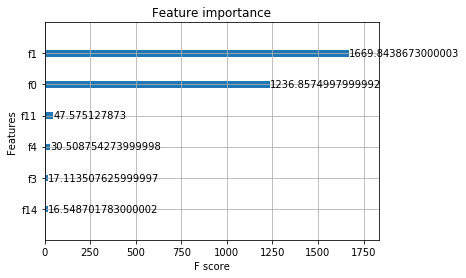

In [163]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

from xgboost import XGBClassifier,plot_importance
xgb_hvc=XGBClassifier(max_depth=3,learning_rate=0.001,n_estimators=100,scale_pos_weight=0.025)

df1=b[b['revenue_level_current_month']=='HVC']

x=df1.drop(['msisdn','revenue_level_current_month','status'],axis=1)
#x['data_support_type']=le.fit_transform(x['data_support_type'])
#x['homing_site_data_type']=le.fit_transform(x['homing_site_data_type'])
x=pd.get_dummies(data=x,columns=['homing_site_data_type','data_support_type'],drop_first=True)
y=df1['status']


    
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123,stratify=y)
xtrain_final,ytrain_final=sm.fit_sample(xtrain,ytrain)
xgb_hvc.fit(xtrain_final,ytrain_final)

plot_importance(xgb_hvc,importance_type='gain')



In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

from xgboost import XGBClassifier,plot_importance
xgb_hvc=XGBClassifier(max_depth=3,learning_rate=0.001,n_estimators=100,scale_pos_weight=0.025)

df1=b[b['revenue_level_current_month']=='HVC']

#x=df1.drop(['msisdn','revenue_level_current_month','status'],axis=1)
#df1['data_support_type']=le.fit_transform(df1['data_support_type'].astype(str))
#df1['homing_site_data_type']=le.fit_transform(df1['homing_site_data_type'].astype(str))
x=df1[['dist_data_days_current_month','AON_months','dist_voc_days_current_month','data_support_type','homing_site_data_type']]
x=pd.get_dummies(data=x,columns=['homing_site_data_type','data_support_type'],drop_first=True)
y=df1['status']


    
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123,stratify=y)
#xtrain_final,ytrain_final=sm.fit_sample(xtrain,ytrain)
xgb_hvc.fit(xtrain,ytrain)
ypred=xgb_hvc.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
#plot_importance(xgb_hvc,importance_type='gain')



[[ 1241   232]
 [15647 41743]]
              precision    recall  f1-score   support

           0       0.07      0.84      0.14      1473
           1       0.99      0.73      0.84     57390

   micro avg       0.73      0.73      0.73     58863
   macro avg       0.53      0.78      0.49     58863
weighted avg       0.97      0.73      0.82     58863



In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

from xgboost import XGBClassifier,plot_importance
from lightgbm import LGBMClassifier
lgbm_hvc=LGBMClassifier(max_depth=3,learning_rate=0.001,n_estimators=200)

df1=b[b['revenue_level_current_month']=='MVC']

#x=df1.drop(['msisdn','revenue_level_current_month','status'],axis=1)
df1['data_support_type']=le.fit_transform(df1['data_support_type'].astype(str))
df1['homing_site_data_type']=le.fit_transform(df1['homing_site_data_type'].astype(str))
x=df1[['dist_data_days_current_month','dist_voc_days_current_month','AON_months','data_support_type',
      'homing_site_data_type']]
#X=pd.get_dummies(data=x,columns=['homing_site_data_type','data_support_type'],drop_first=True)
y=df1['status']


    
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123,stratify=y)
xtrain_final,ytrain_final=sm.fit_sample(xtrain,ytrain)
lgbm_hvc.fit(xtrain_final,ytrain_final)

ypred=lgbm_hvc.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

#plot_importance(xgb_hvc,importance_type='gain')



C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


[[ 38197  16510]
 [ 38850 212442]]
              precision    recall  f1-score   support

           0       0.50      0.70      0.58     54707
           1       0.93      0.85      0.88    251292

   micro avg       0.82      0.82      0.82    305999
   macro avg       0.71      0.77      0.73    305999
weighted avg       0.85      0.82      0.83    305999



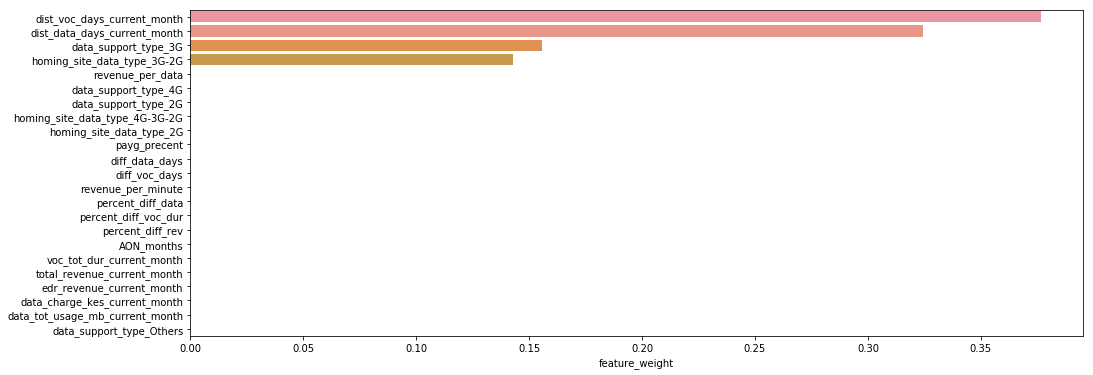

In [114]:
feature_importance=xgb_hvc.feature_importances_

p=pd.DataFrame(feature_importance)
p.index=x.columns
p=p.sort_values(by=0,ascending=False)
p.columns=['feature_weight']

plt.figure(figsize=(16,6))
sns.barplot(data=p,y=p.index,x=p['feature_weight'])

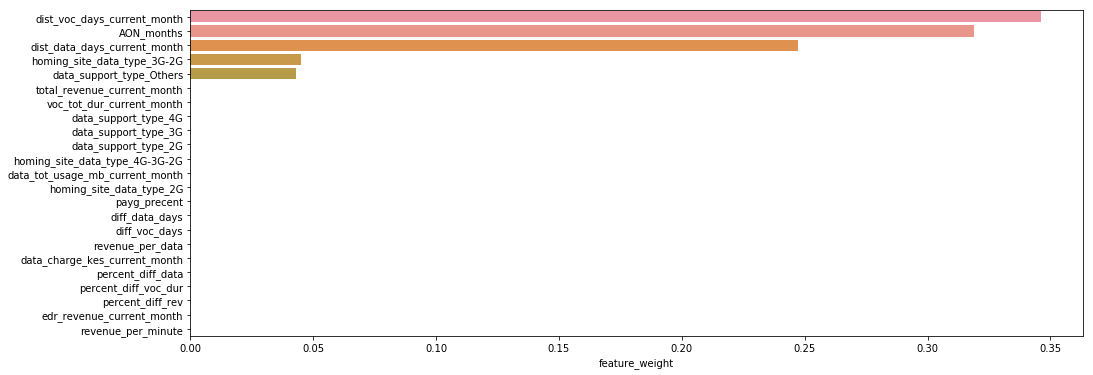

In [115]:
feature_importance=xgb_mvc.feature_importances_

p=pd.DataFrame(feature_importance)
p.index=x.columns
p=p.sort_values(by=0,ascending=False)
p.columns=['feature_weight']

plt.figure(figsize=(16,6))
sns.barplot(data=p,y=p.index,x=p['feature_weight'])

In [91]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

from xgboost import XGBClassifier,plot_importance
rf=RandomForestClassifier(max_depth=3,n_estimators=100)

df1=b[b['revenue_level_current_month']=='HVC']

x=df1.drop(['msisdn','revenue_level_current_month','status'],axis=1)
#x['data_support_type']=le.fit_transform(x['data_support_type'])
#x['homing_site_data_type']=le.fit_transform(x['homing_site_data_type'])
x=pd.get_dummies(data=x,columns=['homing_site_data_type','data_support_type'],drop_first=True)
y=df1['status']


    
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123,stratify=y)
xtrain_final,ytrain_final=sm.fit_sample(xtrain,ytrain)
rf.fit(xtrain_final,ytrain_final)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [116]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

from xgboost import XGBClassifier,plot_importance
rf=RandomForestClassifier(max_depth=3,n_estimators=100)

df1=b[b['revenue_level_current_month']=='MVC']

x=df1.drop(['msisdn','revenue_level_current_month','status'],axis=1)
#x['data_support_type']=le.fit_transform(x['data_support_type'])
#x['homing_site_data_type']=le.fit_transform(x['homing_site_data_type'])
x=pd.get_dummies(data=x,columns=['homing_site_data_type','data_support_type'],drop_first=True)
y=df1['status']


    
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123,stratify=y)
xtrain_final,ytrain_final=sm.fit_sample(xtrain,ytrain)
rf.fit(xtrain_final,ytrain_final)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

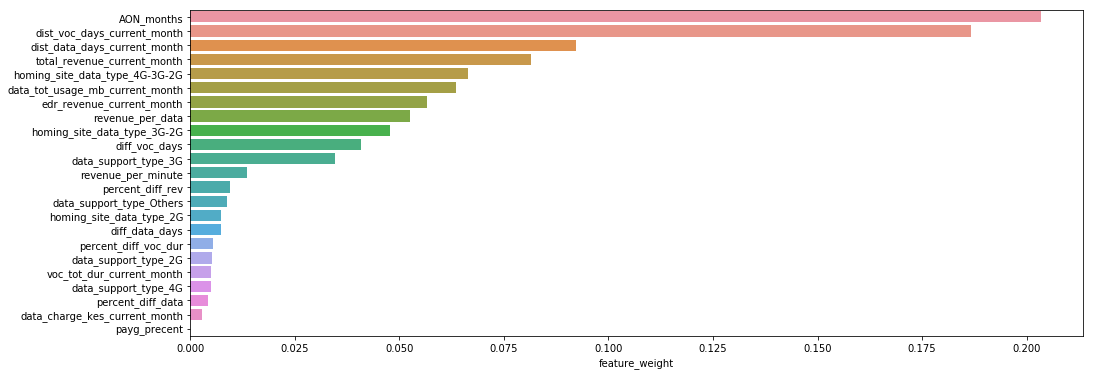

In [118]:
feature_importance=rf.feature_importances_

p=pd.DataFrame(feature_importance)
p.index=x.columns
p=p.sort_values(by=0,ascending=False)
p.columns=['feature_weight']

plt.figure(figsize=(16,6))
sns.barplot(data=p,y=p.index,x=p['feature_weight'])

In [93]:
feature_importance=rf.feature_importances_

In [107]:
p=pd.DataFrame(feature_importance)
p.index=x.columns
p=p.sort_values(by=0,ascending=False)
p.columns=['feature_weight']

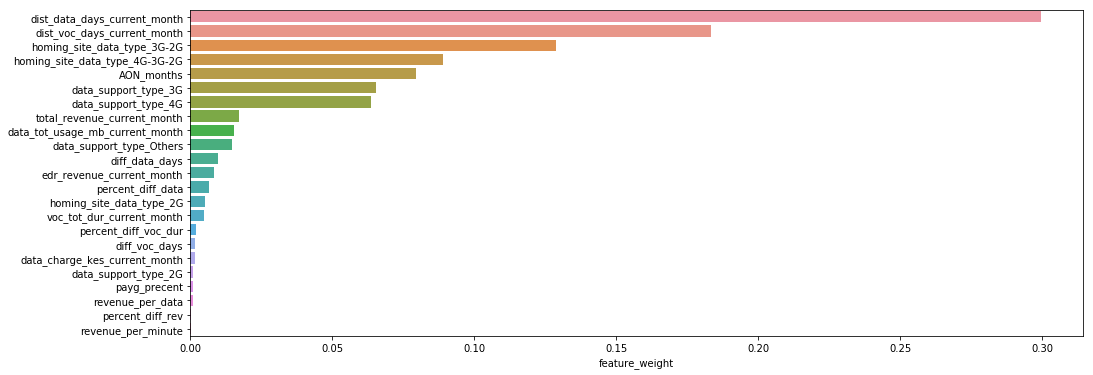

In [111]:
plt.figure(figsize=(16,6))
sns.barplot(data=p,y=p.index,x=p['feature_weight'])

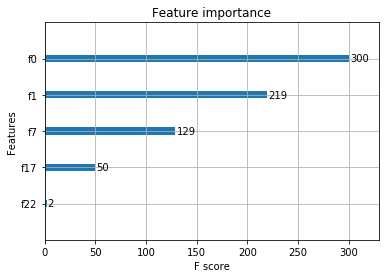

In [113]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

from xgboost import XGBClassifier,plot_importance
xgb_mvc=XGBClassifier(max_depth=3,learning_rate=0.001,n_estimators=100)

df1=b[b['revenue_level_current_month']=='MVC']

x=df1.drop(['msisdn','revenue_level_current_month','status'],axis=1)
#x['data_support_type']=le.fit_transform(x['data_support_type'])
#x['homing_site_data_type']=le.fit_transform(x['homing_site_data_type'])
x=pd.get_dummies(data=x,columns=['homing_site_data_type','data_support_type'],drop_first=True)
y=df1['status']


    
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123,stratify=y)
xtrain_final,ytrain_final=sm.fit_sample(xtrain,ytrain)
xgb_mvc.fit(xtrain_final,ytrain_final)

plot_importance(xgb_mvc)



[0.3765948  0.32387334 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.14532411
 0.         0.         0.15420774 0.         0.        ]


<BarContainer object of 23 artists>

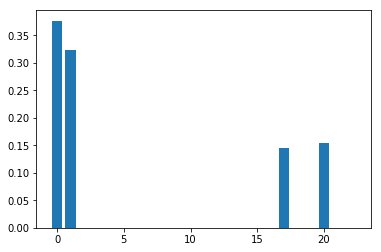

In [85]:
print(xgb.feature_importances_)

plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)

In [90]:
x.columns[22]

'data_support_type_Others'

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

TypeError: boxplot() got an unexpected keyword argument 'showlier'

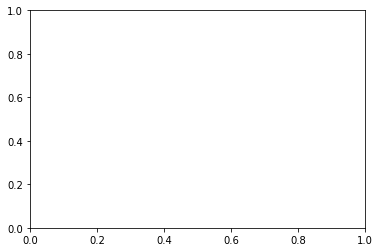

In [23]:
sns.boxplot(x='status',y='diff_data_days',data=b,showlier=False)
plt.show()

In [62]:
from xgboost import XGBClassifier,plot_importance
xgb=XGBClassifier(max_depth=3,learning_rate=0.001,n_estimators=100)
model_rus(b,xgb,'HVC')

ValueError: could not convert string to float: '4G-3G-2G'

In [309]:
lr=LogisticRegression()
model_rus(b,lr,'HVC')

C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


-------------------------------------------------------
Accuracy= 0.8676588009445662
-------------------------------------------------------
Confusion matrix= [[  685   788]
 [ 7002 50388]]
-------------------------------------------------------
PR AUC= 0.9904177230174285
classification report=               precision    recall  f1-score   support

           0       0.09      0.47      0.15      1473
           1       0.98      0.88      0.93     57390

   micro avg       0.87      0.87      0.87     58863
   macro avg       0.54      0.67      0.54     58863
weighted avg       0.96      0.87      0.91     58863

--------------------------------------------------------
f1 score= 0.928246412320616
---------------------------------------------------------
ROC AUC score= 0.671515010208141
-----------------------------------------------------------
True positive rate = 0.08911148692597892
False positive rate = 0.12200731834814428
True negative rate = 0.9846021572612162
False negative rat

In [310]:
#Build model for the data
rf=RandomForestClassifier(max_depth=3)
model_rus(b,rf,'HVC')

C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-------------------------------------------------------
Accuracy= 0.7633997587618708
-------------------------------------------------------
Confusion matrix= [[ 1202   271]
 [13656 43734]]
-------------------------------------------------------
PR AUC= 0.9950477880446194
classification report=               precision    recall  f1-score   support

           0       0.08      0.82      0.15      1473
           1       0.99      0.76      0.86     57390

   micro avg       0.76      0.76      0.76     58863
   macro avg       0.54      0.79      0.50     58863
weighted avg       0.97      0.76      0.84     58863

--------------------------------------------------------
f1 score= 0.862646087085162
---------------------------------------------------------
ROC AUC score= 0.7890354309262135
-----------------------------------------------------------
True positive rate = 0.08089917889352537
False positive rate = 0.2379508625196027
True negative rate = 0.9938416089080786
False negative rat

In [311]:
brf=BalancedRandomForestClassifier(max_depth=3,n_estimators=400)
model_rus(b,brf,'HVC')

-------------------------------------------------------
Accuracy= 0.7511000118920205
-------------------------------------------------------
Confusion matrix= [[ 1218   255]
 [14396 42994]]
-------------------------------------------------------
PR AUC= 0.995591621668564
classification report=               precision    recall  f1-score   support

           0       0.08      0.83      0.14      1473
           1       0.99      0.75      0.85     57390

   micro avg       0.75      0.75      0.75     58863
   macro avg       0.54      0.79      0.50     58863
weighted avg       0.97      0.75      0.84     58863

--------------------------------------------------------
f1 score= 0.8544202545732766
---------------------------------------------------------
ROC AUC score= 0.7880194077113429
-----------------------------------------------------------
True positive rate = 0.07800691686947611
False positive rate = 0.2508450949642795
True negative rate = 0.9941039099169923
False negative rat

In [312]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate=0.001,max_depth=3,n_estimators=50)
model_rus(b,lgbm,'HVC')

-------------------------------------------------------
Accuracy= 0.7552112532490699
-------------------------------------------------------
Confusion matrix= [[ 1199   274]
 [14135 43255]]
-------------------------------------------------------
PR AUC= 0.9951899020606052
classification report=               precision    recall  f1-score   support

           0       0.08      0.81      0.14      1473
           1       0.99      0.75      0.86     57390

   micro avg       0.76      0.76      0.76     58863
   macro avg       0.54      0.78      0.50     58863
weighted avg       0.97      0.76      0.84     58863

--------------------------------------------------------
f1 score= 0.8572221286378184
---------------------------------------------------------
ROC AUC score= 0.7838439000812322
-----------------------------------------------------------
True positive rate = 0.0781922525107604
False positive rate = 0.2462972643317651
True negative rate = 0.9937053458613798
False negative rat

In [313]:
from xgboost import XGBClassifier
xgb=XGBClassifier(max_depth=3,learning_rate=0.001,n_estimators=100)
model_rus(b,xgb,'MVC')

-------------------------------------------------------
Accuracy= 0.8119961176343714
-------------------------------------------------------
Confusion matrix= [[ 38533  16174]
 [ 41355 209937]]
-------------------------------------------------------
PR AUC= 0.9607888996512924
classification report=               precision    recall  f1-score   support

           0       0.48      0.70      0.57     54707
           1       0.93      0.84      0.88    251292

   micro avg       0.81      0.81      0.81    305999
   macro avg       0.71      0.77      0.73    305999
weighted avg       0.85      0.81      0.82    305999

--------------------------------------------------------
f1 score= 0.8794959394892785
---------------------------------------------------------
ROC AUC score= 0.7698913859373598
-----------------------------------------------------------
True positive rate = 0.48233777288203483
False positive rate = 0.16456950479919774
True negative rate = 0.92846876091831
False negative

In [318]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate=0.001,max_depth=3,n_estimators=200)
model_rus(b,lgbm,'MVC')

-------------------------------------------------------
Accuracy= 0.8179438494897042
-------------------------------------------------------
Confusion matrix= [[ 38407  16300]
 [ 39409 211883]]
-------------------------------------------------------
PR AUC= 0.9615333438505806
classification report=               precision    recall  f1-score   support

           0       0.49      0.70      0.58     54707
           1       0.93      0.84      0.88    251292

   micro avg       0.82      0.82      0.82    305999
   macro avg       0.71      0.77      0.73    305999
weighted avg       0.85      0.82      0.83    305999

--------------------------------------------------------
f1 score= 0.8838125032587727
---------------------------------------------------------
ROC AUC score= 0.7726117861191932
-----------------------------------------------------------
True positive rate = 0.4935617353757582
False positive rate = 0.15682552568326888
True negative rate = 0.9285661070281309
False negativ

In [315]:
brf=BalancedRandomForestClassifier(max_depth=3,n_estimators=400)
model_rus(b,brf,'MVC')

-------------------------------------------------------
Accuracy= 0.8794407824862173
-------------------------------------------------------
Confusion matrix= [[ 31204  23503]
 [ 13388 237904]]
-------------------------------------------------------
PR AUC= 0.9589415333736441
classification report=               precision    recall  f1-score   support

           0       0.70      0.57      0.63     54707
           1       0.91      0.95      0.93    251292

   micro avg       0.88      0.88      0.88    305999
   macro avg       0.80      0.76      0.78    305999
weighted avg       0.87      0.88      0.87    305999

--------------------------------------------------------
f1 score= 0.9280455003813154
---------------------------------------------------------
ROC AUC score= 0.7585536898641034
-----------------------------------------------------------
True positive rate = 0.6997667743092931
False positive rate = 0.053276666189134556
True negative rate = 0.9100903954370005
False negati

In [316]:
lr=LogisticRegression()
model_rus(b,lr,'MVC')

C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


-------------------------------------------------------
Accuracy= 0.8373229977875745
-------------------------------------------------------
Confusion matrix= [[ 33711  20996]
 [ 28783 222509]]
-------------------------------------------------------
PR AUC= 0.9500542516978417
classification report=               precision    recall  f1-score   support

           0       0.54      0.62      0.58     54707
           1       0.91      0.89      0.90    251292

   micro avg       0.84      0.84      0.84    305999
   macro avg       0.73      0.75      0.74    305999
weighted avg       0.85      0.84      0.84    305999

--------------------------------------------------------
f1 score= 0.8993951054674946
---------------------------------------------------------
ROC AUC score= 0.7508349672116394
-----------------------------------------------------------
True positive rate = 0.5394277850673664
False positive rate = 0.11454005698549895
True negative rate = 0.9137758978255066
False negativ

In [317]:
#Build model for the data
rf=RandomForestClassifier(max_depth=3)
model_rus(b,rf,'MVC')

C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-------------------------------------------------------
Accuracy= 0.875604168641074
-------------------------------------------------------
Confusion matrix= [[ 31954  22753]
 [ 15312 235980]]
-------------------------------------------------------
PR AUC= 0.956945850555805
classification report=               precision    recall  f1-score   support

           0       0.68      0.58      0.63     54707
           1       0.91      0.94      0.93    251292

   micro avg       0.88      0.88      0.88    305999
   macro avg       0.79      0.76      0.78    305999
weighted avg       0.87      0.88      0.87    305999

--------------------------------------------------------
f1 score= 0.9253664036076663
---------------------------------------------------------
ROC AUC score= 0.7615801727507054
-----------------------------------------------------------
True positive rate = 0.6760462065755511
False positive rate = 0.06093309775082374
True negative rate = 0.9120599227775351
False negative 

In [286]:
from xgboost import XGBClassifier
xgb=XGBClassifier(max_depth=3,learning_rate=0.001,n_estimators=100,scale_pos_weight=0.02)

In [287]:
model(b,xgb,'HVC')

-------------------------------------------------------
Accuracy= 0.43137454767850775
-------------------------------------------------------
Confusion matrix= [[ 1439    34]
 [33437 23953]]
-------------------------------------------------------
PR AUC= 0.9925598896012827
classification report=               precision    recall  f1-score   support

           0       0.04      0.98      0.08      1473
           1       1.00      0.42      0.59     57390

   micro avg       0.43      0.43      0.43     58863
   macro avg       0.52      0.70      0.33     58863
weighted avg       0.97      0.43      0.58     58863

--------------------------------------------------------
f1 score= 0.5886921365987933
---------------------------------------------------------
ROC AUC score= 0.6971451096208492
-----------------------------------------------------------
True positive rate = 0.041260465649730474
False positive rate = 0.5826276354765638
True negative rate = 0.9985825655563431
False negative 

In [201]:
model(nov,xgb,'HVC')

-------------------------------------------------------
Accuracy= 0.7218966073764504
-------------------------------------------------------
Confusion matrix= [[ 1732   325]
 [16045 40761]]
-------------------------------------------------------
PR AUC= 0.9928355752803306
classification report=               precision    recall  f1-score   support

           0       0.10      0.84      0.17      2057
           1       0.99      0.72      0.83     56806

   micro avg       0.72      0.72      0.72     58863
   macro avg       0.54      0.78      0.50     58863
weighted avg       0.96      0.72      0.81     58863

--------------------------------------------------------
f1 score= 0.8327748947820047
---------------------------------------------------------
ROC AUC score= 0.7797751795204143
-----------------------------------------------------------
True positive rate = 0.09742926253023569
False positive rate = 0.2824525578283984
True negative rate = 0.99208976293628
False negative rate

In [22]:
from xgboost import XGBClassifier
xgb=XGBClassifier(max_depth=3,learning_rate=0.001,n_estimators=50)
model(b,xgb,'MVC')

-------------------------------------------------------
Accuracy= 0.8059176663976027
-------------------------------------------------------
Confusion matrix= [[ 40130  14577]
 [ 44812 206480]]
-------------------------------------------------------
PR AUC= 0.6606354403853623
classification report=               precision    recall  f1-score   support

           0       0.47      0.73      0.57     54707
           1       0.93      0.82      0.87    251292

   micro avg       0.81      0.81      0.81    305999
   macro avg       0.70      0.78      0.72    305999
weighted avg       0.85      0.81      0.82    305999

--------------------------------------------------------
f1 score= 0.8742688139490079
---------------------------------------------------------
ROC AUC score= 0.7776088721406683
-----------------------------------------------------------
True positive rate = 0.47244001789456336
False positive rate = 0.17832640911767983
True negative rate = 0.9340577317162542
False negati

In [202]:
from xgboost import XGBClassifier
xgb=XGBClassifier(max_depth=3,learning_rate=0.001,n_estimators=50)
model(nov,xgb,'MVC')

-------------------------------------------------------
Accuracy= 0.7638750453432854
-------------------------------------------------------
Confusion matrix= [[ 49455  17557]
 [ 54697 184290]]
-------------------------------------------------------
PR AUC= 0.9439045979668302
classification report=               precision    recall  f1-score   support

           0       0.47      0.74      0.58     67012
           1       0.91      0.77      0.84    238987

   micro avg       0.76      0.76      0.76    305999
   macro avg       0.69      0.75      0.71    305999
weighted avg       0.82      0.76      0.78    305999

--------------------------------------------------------
f1 score= 0.8360970342577931
---------------------------------------------------------
ROC AUC score= 0.7545659796384784
-----------------------------------------------------------
True positive rate = 0.4748348567478301
False positive rate = 0.2288701895919025
True negative rate = 0.9130182762191165
False negative

In [107]:
lr=LogisticRegression(C=1000)
model(b,lr,'HVC')

C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


-------------------------------------------------------
Accuracy= 0.8887246657492822
-------------------------------------------------------
Confusion matrix= [[51655  5735]
 [  815   658]]
-------------------------------------------------------
PR AUC= 0.08892813827081443
classification report=               precision    recall  f1-score   support

           0       0.98      0.90      0.94     57390
           1       0.10      0.45      0.17      1473

   micro avg       0.89      0.89      0.89     58863
   macro avg       0.54      0.67      0.55     58863
weighted avg       0.96      0.89      0.92     58863

--------------------------------------------------------
f1 score= 0.167302313755403
---------------------------------------------------------
ROC AUC score= 0.6733885492089889
-----------------------------------------------------------
True positive rate = 0.9844673146559939
False positive rate = 0.5532926001357773
True negative rate = 0.10292507430001564
False negative ra

In [205]:
lr=LogisticRegression()
model(nov,lr,'HVC')

C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


-------------------------------------------------------
Accuracy= 0.8959448210250922
-------------------------------------------------------
Confusion matrix= [[  675  1382]
 [ 4743 52063]]
-------------------------------------------------------
PR AUC= 0.9850156319705168
classification report=               precision    recall  f1-score   support

           0       0.12      0.33      0.18      2057
           1       0.97      0.92      0.94     56806

   micro avg       0.90      0.90      0.90     58863
   macro avg       0.55      0.62      0.56     58863
weighted avg       0.94      0.90      0.92     58863

--------------------------------------------------------
f1 score= 0.9444449483451396
---------------------------------------------------------
ROC AUC score= 0.6223265433884426
-----------------------------------------------------------
True positive rate = 0.12458471760797342
False positive rate = 0.08349470126395099
True negative rate = 0.9741416409392833
False negative r

In [146]:
lr=LogisticRegression(C=1000)
model(b,lr,'MVC')

C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


-------------------------------------------------------
Accuracy= 0.8357184173804489
-------------------------------------------------------
Confusion matrix= [[ 33821  20886]
 [ 29384 221908]]
-------------------------------------------------------
classification report=               precision    recall  f1-score   support

           0       0.54      0.62      0.57     54707
           1       0.91      0.88      0.90    251292

   micro avg       0.84      0.84      0.84    305999
   macro avg       0.72      0.75      0.74    305999
weighted avg       0.85      0.84      0.84    305999

--------------------------------------------------------
f1 score= 0.8982565788142145
---------------------------------------------------------
ROC AUC score= 0.7506445030139698
-----------------------------------------------------------
True positive rate = 0.535100071196899
False positive rate = 0.11693169698995591
True negative rate = 0.9139764574083379
False negative rate = 0.38177929698210467

In [204]:
lr=LogisticRegression(C=1000)
model(nov,lr,'MVC')

C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


-------------------------------------------------------
Accuracy= 0.8091529710881408
-------------------------------------------------------
Confusion matrix= [[ 38094  28918]
 [ 29481 209506]]
-------------------------------------------------------
PR AUC= 0.9270638186734542
classification report=               precision    recall  f1-score   support

           0       0.56      0.57      0.57     67012
           1       0.88      0.88      0.88    238987

   micro avg       0.81      0.81      0.81    305999
   macro avg       0.72      0.72      0.72    305999
weighted avg       0.81      0.81      0.81    305999

--------------------------------------------------------
f1 score= 0.8776756295937883
---------------------------------------------------------
ROC AUC score= 0.7225535875978222
-----------------------------------------------------------
True positive rate = 0.5637291897891232
False positive rate = 0.12335817429399926
True negative rate = 0.8787118746434923
False negativ

In [88]:
#Build model for the data
rf=RandomForestClassifier(max_depth=3)
model(b,rf,'HVC')

C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-------------------------------------------------------
Accuracy= 0.8350067104972564
-------------------------------------------------------
Confusion matrix= [[ 1048   425]
 [ 9287 48103]]
-------------------------------------------------------
PR AUC= 0.9351076909680938
classification report=               precision    recall  f1-score   support

           0       0.10      0.71      0.18      1473
           1       0.99      0.84      0.91     57390

   micro avg       0.84      0.84      0.84     58863
   macro avg       0.55      0.77      0.54     58863
weighted avg       0.97      0.84      0.89     58863

--------------------------------------------------------
f1 score= 0.9083064257255613
---------------------------------------------------------
ROC AUC score= 0.774825283398791
-----------------------------------------------------------
True positive rate = 0.10140299951620706
False positive rate = 0.1618226171806935
True negative rate = 0.9912421694691724
False negative rat

In [304]:
#Build model for the data
rf=RandomForestClassifier(max_depth=3)
model_rus(b,rf,'HVC')

C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-------------------------------------------------------
Accuracy= 0.7481609839797496
-------------------------------------------------------
Confusion matrix= [[ 1227   246]
 [14578 42812]]
-------------------------------------------------------
PR AUC= 0.9948657053155883
classification report=               precision    recall  f1-score   support

           0       0.08      0.83      0.14      1473
           1       0.99      0.75      0.85     57390

   micro avg       0.75      0.75      0.75     58863
   macro avg       0.54      0.79      0.50     58863
weighted avg       0.97      0.75      0.83     58863

--------------------------------------------------------
f1 score= 0.8524211532335139
---------------------------------------------------------
ROC AUC score= 0.7894887554301171
-----------------------------------------------------------
True positive rate = 0.07763366023410313
False positive rate = 0.2540163791601324
True negative rate = 0.9942867759765898
False negative ra

In [206]:
#Build model for the data
rf=RandomForestClassifier(max_depth=3)
model(nov,rf,'HVC')

C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-------------------------------------------------------
Accuracy= 0.7525610315478314
-------------------------------------------------------
Confusion matrix= [[ 1671   386]
 [14179 42627]]
-------------------------------------------------------
PR AUC= 0.9917834710437821
classification report=               precision    recall  f1-score   support

           0       0.11      0.81      0.19      2057
           1       0.99      0.75      0.85     56806

   micro avg       0.75      0.75      0.75     58863
   macro avg       0.55      0.78      0.52     58863
weighted avg       0.96      0.75      0.83     58863

--------------------------------------------------------
f1 score= 0.8540858954708022
---------------------------------------------------------
ROC AUC score= 0.7813720823241829
-----------------------------------------------------------
True positive rate = 0.10542586750788643
False positive rate = 0.24960391507939303
True negative rate = 0.9910259688931253
False negative r

In [147]:
#Build model for the data
rf=RandomForestClassifier(max_depth=3)
model(b,rf,'MVC')

C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-------------------------------------------------------
Accuracy= 0.8753884816617048
-------------------------------------------------------
Confusion matrix= [[ 31359  23348]
 [ 14783 236509]]
-------------------------------------------------------
classification report=               precision    recall  f1-score   support

           0       0.68      0.57      0.62     54707
           1       0.91      0.94      0.93    251292

   micro avg       0.88      0.88      0.88    305999
   macro avg       0.79      0.76      0.77    305999
weighted avg       0.87      0.88      0.87    305999

--------------------------------------------------------
f1 score= 0.9254013995918998
---------------------------------------------------------
ROC AUC score= 0.7571946721758827
-----------------------------------------------------------
True positive rate = 0.6796194356551515
False positive rate = 0.05882797701478758
True negative rate = 0.9101505828205513
False negative rate = 0.4267826786334472

In [207]:
#Build model for the data
rf=RandomForestClassifier(max_depth=3)
model(nov,rf,'MVC')

C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-------------------------------------------------------
Accuracy= 0.8417184369883561
-------------------------------------------------------
Confusion matrix= [[ 34467  32545]
 [ 15889 223098]]
-------------------------------------------------------
PR AUC= 0.9293525151084465
classification report=               precision    recall  f1-score   support

           0       0.68      0.51      0.59     67012
           1       0.87      0.93      0.90    238987

   micro avg       0.84      0.84      0.84    305999
   macro avg       0.78      0.72      0.74    305999
weighted avg       0.83      0.84      0.83    305999

--------------------------------------------------------
f1 score= 0.9020803428825586
---------------------------------------------------------
ROC AUC score= 0.7239279636101563
-----------------------------------------------------------
True positive rate = 0.6844665978234967
False positive rate = 0.06648478787549114
True negative rate = 0.872693560942408
False negative

In [62]:
#LogisticRegression=LogisticRegression(C=100)
#KNeighborsClassifier=KNeighborsClassifier()
#BalancedRandomForestClassifier=BalancedRandomForestClassifier(n_estimators=200, random_state=123)
#XGBClassifier=XGBClassifier()
#GaussianNB=GaussianNB()
LGBMClassifier=LGBMClassifier(imbalance=True)
#DecisionTreeClassifier=DecisionTreeClassifier()

In [40]:
model_names=[LogisticRegression,KNeighborsClassifier,BalancedRandomForestClassifier,GaussianNB,
             LGBMClassifier,DecisionTreeClassifier]

In [91]:
model(b,LGBMClassifier,'HVC')

TypeError: fit() missing 1 required positional argument: 'y'

In [140]:
brf=BalancedRandomForestClassifier(max_depth=3,n_estimators=400)
model(b,brf,'HVC')

-------------------------------------------------------
Accuracy= 0.758524030375618
-------------------------------------------------------
Confusion matrix= [[ 1217   256]
 [13958 43432]]
-------------------------------------------------------
classification report=               precision    recall  f1-score   support

           0       0.08      0.83      0.15      1473
           1       0.99      0.76      0.86     57390

   micro avg       0.76      0.76      0.76     58863
   macro avg       0.54      0.79      0.50     58863
weighted avg       0.97      0.76      0.84     58863

--------------------------------------------------------
f1 score= 0.8593759275015335
---------------------------------------------------------
ROC AUC score= 0.791495960216463
-----------------------------------------------------------
True positive rate = 0.08019769357495882
False positive rate = 0.24321310332810595
True negative rate = 0.9941402673503021
False negative rate = 0.17379497623896809


In [307]:
brf=BalancedRandomForestClassifier(max_depth=3,n_estimators=400)
model_rus(b,brf,'HVC')

-------------------------------------------------------
Accuracy= 0.7505733652719025
-------------------------------------------------------
Confusion matrix= [[ 1224   249]
 [14433 42957]]
-------------------------------------------------------
PR AUC= 0.9956869592197601
classification report=               precision    recall  f1-score   support

           0       0.08      0.83      0.14      1473
           1       0.99      0.75      0.85     57390

   micro avg       0.75      0.75      0.75     58863
   macro avg       0.54      0.79      0.50     58863
weighted avg       0.97      0.75      0.84     58863

--------------------------------------------------------
f1 score= 0.8540498628176071
---------------------------------------------------------
ROC AUC score= 0.7897337117780264
-----------------------------------------------------------
True positive rate = 0.0781758957654723
False positive rate = 0.2514898065865133
True negative rate = 0.9942369115400639
False negative rat

In [305]:
brf=BalancedRandomForestClassifier(max_depth=3,n_estimators=400)
model_rus(b,brf,'HVC')

-------------------------------------------------------
Accuracy= 0.7544467662198665
-------------------------------------------------------
Confusion matrix= [[ 1214   259]
 [14195 43195]]
-------------------------------------------------------
PR AUC= 0.9956519418893425
classification report=               precision    recall  f1-score   support

           0       0.08      0.82      0.14      1473
           1       0.99      0.75      0.86     57390

   micro avg       0.75      0.75      0.75     58863
   macro avg       0.54      0.79      0.50     58863
weighted avg       0.97      0.75      0.84     58863

--------------------------------------------------------
f1 score= 0.856669707667288
---------------------------------------------------------
ROC AUC score= 0.7884128106225707
-----------------------------------------------------------
True positive rate = 0.0787851255759621
False positive rate = 0.24734274263809025
True negative rate = 0.9940396741381691
False negative rat

In [208]:
brf=BalancedRandomForestClassifier(max_depth=3,n_estimators=400)
model(nov,brf,'HVC')

-------------------------------------------------------
Accuracy= 0.7286580704347383
-------------------------------------------------------
Confusion matrix= [[ 1732   325]
 [15647 41159]]
-------------------------------------------------------
PR AUC= 0.9923846219027004
classification report=               precision    recall  f1-score   support

           0       0.10      0.84      0.18      2057
           1       0.99      0.72      0.84     56806

   micro avg       0.73      0.73      0.73     58863
   macro avg       0.55      0.78      0.51     58863
weighted avg       0.96      0.73      0.81     58863

--------------------------------------------------------
f1 score= 0.8375012717468715
---------------------------------------------------------
ROC AUC score= 0.7832783305960048
-----------------------------------------------------------
True positive rate = 0.09966050981069106
False positive rate = 0.2754462556772172
True negative rate = 0.9921656542281362
False negative ra

In [149]:
brf=BalancedRandomForestClassifier(max_depth=3,n_estimators=400)
model(b,brf,'MVC')

-------------------------------------------------------
Accuracy= 0.8813394815015735
-------------------------------------------------------
Confusion matrix= [[ 30793  23914]
 [ 12396 238896]]
-------------------------------------------------------
classification report=               precision    recall  f1-score   support

           0       0.71      0.56      0.63     54707
           1       0.91      0.95      0.93    251292

   micro avg       0.88      0.88      0.88    305999
   macro avg       0.81      0.76      0.78    305999
weighted avg       0.87      0.88      0.88    305999

--------------------------------------------------------
f1 score= 0.9293719923283706
---------------------------------------------------------
ROC AUC score= 0.7567711143990192
-----------------------------------------------------------
True positive rate = 0.7129824723888027
False positive rate = 0.04932906737978129
True negative rate = 0.9090065066017274
False negative rate = 0.43712870382218


In [209]:
brf=BalancedRandomForestClassifier(max_depth=3,n_estimators=400)
model(nov,brf,'MVC')

-------------------------------------------------------
Accuracy= 0.8266857081232292
-------------------------------------------------------
Confusion matrix= [[ 41063  25949]
 [ 27085 211902]]
-------------------------------------------------------
PR AUC= 0.9399372398863469
classification report=               precision    recall  f1-score   support

           0       0.60      0.61      0.61     67012
           1       0.89      0.89      0.89    238987

   micro avg       0.83      0.83      0.83    305999
   macro avg       0.75      0.75      0.75    305999
weighted avg       0.83      0.83      0.83    305999

--------------------------------------------------------
f1 score= 0.8887798371774062
---------------------------------------------------------
ROC AUC score= 0.7497191613246126
-----------------------------------------------------------
True positive rate = 0.6025562012091331
False positive rate = 0.11333252436324988
True negative rate = 0.8909022875665858
False negativ

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='AON_months',data=c,hue='status')
plt.show()

<Figure size 640x480 with 1 Axes>

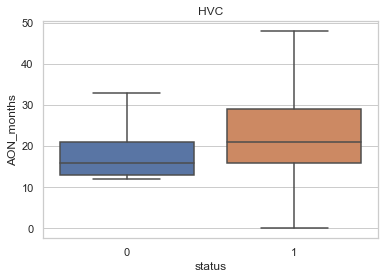

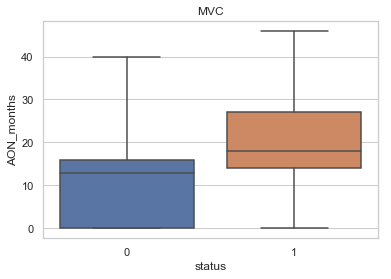

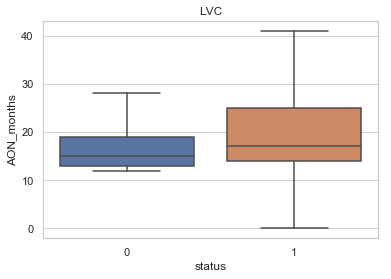

In [101]:
list1=['HVC','MVC','LVC']
for i in list1:
    a=c[c['revenue_level_current_month']==i]
    plt.title(i)
    sns.set(style="whitegrid")
    sns.boxplot(x='status',y='AON_months',data=a,showfliers=False)
    plt.show()

### With only one month data

### modelling for november and october data

In [300]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate=0.001,max_depth=3,n_estimators=50)
model(b,lgbm,'HVC')

-------------------------------------------------------
Accuracy= 0.7302380102950919
-------------------------------------------------------
Confusion matrix= [[ 1241   232]
 [15647 41743]]
-------------------------------------------------------
PR AUC= 0.9950476252290947
classification report=               precision    recall  f1-score   support

           0       0.07      0.84      0.14      1473
           1       0.99      0.73      0.84     57390

   micro avg       0.73      0.73      0.73     58863
   macro avg       0.53      0.78      0.49     58863
weighted avg       0.97      0.73      0.82     58863

--------------------------------------------------------
f1 score= 0.8401952397725557
---------------------------------------------------------
ROC AUC score= 0.7849274925661383
-----------------------------------------------------------
True positive rate = 0.07348413074372336
False positive rate = 0.27264331765115873
True negative rate = 0.9944729005360333
False negative r

In [306]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate=1,max_depth=3,n_estimators=50)
model_rus(b,lgbm,'HVC')

-------------------------------------------------------
Accuracy= 0.7770416050829894
-------------------------------------------------------
Confusion matrix= [[ 1166   307]
 [12817 44573]]
-------------------------------------------------------
PR AUC= 0.9955087192485126
classification report=               precision    recall  f1-score   support

           0       0.08      0.79      0.15      1473
           1       0.99      0.78      0.87     57390

   micro avg       0.78      0.78      0.78     58863
   macro avg       0.54      0.78      0.51     58863
weighted avg       0.97      0.78      0.85     58863

--------------------------------------------------------
f1 score= 0.8716730223917082
---------------------------------------------------------
ROC AUC score= 0.7841251074844677
-----------------------------------------------------------
True positive rate = 0.08338696989201173
False positive rate = 0.22333159086948945
True negative rate = 0.9931595365418895
False negative r

In [210]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate=0.001,max_depth=3,n_estimators=50)
model(nov,lgbm,'HVC')

-------------------------------------------------------
Accuracy= 0.7218966073764504
-------------------------------------------------------
Confusion matrix= [[ 1732   325]
 [16045 40761]]
-------------------------------------------------------
PR AUC= 0.9925060722517791
classification report=               precision    recall  f1-score   support

           0       0.10      0.84      0.17      2057
           1       0.99      0.72      0.83     56806

   micro avg       0.72      0.72      0.72     58863
   macro avg       0.54      0.78      0.50     58863
weighted avg       0.96      0.72      0.81     58863

--------------------------------------------------------
f1 score= 0.8327748947820047
---------------------------------------------------------
ROC AUC score= 0.7797751795204143
-----------------------------------------------------------
True positive rate = 0.09742926253023569
False positive rate = 0.2824525578283984
True negative rate = 0.99208976293628
False negative rate

In [148]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate=0.001,max_depth=3,n_estimators=500)
model(b,lgbm,'MVC')

-------------------------------------------------------
Accuracy= 0.8059176663976027
-------------------------------------------------------
Confusion matrix= [[ 40130  14577]
 [ 44812 206480]]
-------------------------------------------------------
classification report=               precision    recall  f1-score   support

           0       0.47      0.73      0.57     54707
           1       0.93      0.82      0.87    251292

   micro avg       0.81      0.81      0.81    305999
   macro avg       0.70      0.78      0.72    305999
weighted avg       0.85      0.81      0.82    305999

--------------------------------------------------------
f1 score= 0.8742688139490079
---------------------------------------------------------
ROC AUC score= 0.7776088721406683
-----------------------------------------------------------
True positive rate = 0.47244001789456336
False positive rate = 0.17832640911767983
True negative rate = 0.9340577317162542
False negative rate = 0.266455846600983

In [211]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate=0.001,max_depth=3,n_estimators=50)
model(nov,lgbm,'MVC')

-------------------------------------------------------
Accuracy= 0.7504632368079635
-------------------------------------------------------
Confusion matrix= [[ 51073  15939]
 [ 60419 178568]]
-------------------------------------------------------
PR AUC= 0.9439756460391555
classification report=               precision    recall  f1-score   support

           0       0.46      0.76      0.57     67012
           1       0.92      0.75      0.82    238987

   micro avg       0.75      0.75      0.75    305999
   macro avg       0.69      0.75      0.70    305999
weighted avg       0.82      0.75      0.77    305999

--------------------------------------------------------
f1 score= 0.8238545400859068
---------------------------------------------------------
ROC AUC score= 0.7546670818126326
-----------------------------------------------------------
True positive rate = 0.45808667886485127
False positive rate = 0.25281291450999427
True negative rate = 0.9180543630820485
False negati

In [189]:
df_dec=pd.read_csv('dec_18_new.csv',header=None)
df_dec.head()

C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (67,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,254202000165,Dec-2018,12,1,0,0,0,1.71,0,1,...,0,0,0,0,0,0,0,0,0.0,0.0
1,254202000238,Dec-2018,12,0,0,9,0,1.01,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,254202000311,Dec-2018,12,0,0,1,0,0.00,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,254202000736,Dec-2018,12,9,1,23,0,3.55,8,26,...,50,0,80,0,0,0,2,0,0.0,0.0
4,254202001032,Dec-2018,12,0,0,22,0,0.00,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [190]:
churn_dec=pd.read_csv('churn_december.csv')
nonchurn_dec=pd.read_csv('nonchurners_dec.csv')

In [191]:
#preprocess the current month data
test_1=preprocess_df_current_month(df_dec,churn_dec,nonchurn_dec,20191231)
#Preprocess the previous month data and combines both previous month data and current month data
test=preprocess_previous_month(current_month_1,test_1,churn_dec,nonchurn_dec)

In [192]:
def model_test(df,df_test,m,revenue_level):
    df1=df[df['revenue_level_current_month']==revenue_level]
    
    x=df1.drop(['msisdn','revenue_level_current_month','status'],axis=1)
    y=df1['status']
    
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123,stratify=y)
    xtrain_final,ytrain_final=sm.fit_sample(xtrain,ytrain)
    m.fit(xtrain_final,ytrain_final)
    y_pred=m.predict(xtest)
    print('-------------------------------------------------------')
    print('Accuracy=',accuracy_score(ytest,y_pred))
    print('-------------------------------------------------------')
    print('Confusion matrix=',confusion_matrix(ytest,y_pred))
    print('-------------------------------------------------------')
    print('classification report=',classification_report(ytest,y_pred))
    print('--------------------------------------------------------')
    print('f1 score=',f1_score(ytest,y_pred))
    print('---------------------------------------------------------')
    print('ROC AUC score=',roc_auc_score(ytest,y_pred))
    print('-----------------------------------------------------------')
    cm=confusion_matrix(ytest,y_pred)
    tpr=cm[0,0]/(cm[0,0]+cm[1,0])
    fpr=cm[1,0]/(cm[1,0]+cm[1,1])
    tnr=cm[1,1]/(cm[0,1]+cm[1,1])
    fnr=cm[0,1]/(cm[0,1]+cm[0,0])
    print('True positive rate =',tpr)
    print('False positive rate =',fpr)
    print('True negative rate =',tnr)
    print('False negative rate =',fnr)
    print('-----------------------------------------------------')
    print('Test for december dataset')
    print('-----------------------------------------------------')
    test1=test[test['revenue_level_current_month']==revenue_level]
    x_test=test1.drop(['msisdn','revenue_level_current_month','status'],axis=1)
    y_test=test1['status']
    
    ypred_test=m.predict(x_test)
    
    print('Accuracy=',accuracy_score(y_test,ypred_test))
    print('-------------------------------------------------------')
    print('Confusion matrix=',confusion_matrix(y_test,ypred_test))
    print('-------------------------------------------------------')
    print('classification report=',classification_report(y_test,ypred_test))
    print('--------------------------------------------------------')
    print('f1 score=',f1_score(y_test,ypred_test))
    print('---------------------------------------------------------')
    print('ROC AUC score=',roc_auc_score(y_test,ypred_test))
    print('-----------------------------------------------------------')
    cm=confusion_matrix(y_test,ypred_test)
    tpr=cm[0,0]/(cm[0,0]+cm[1,0])
    fpr=cm[1,0]/(cm[1,0]+cm[1,1])
    tnr=cm[1,1]/(cm[0,1]+cm[1,1])
    fnr=cm[0,1]/(cm[0,1]+cm[0,0])
    print('True positive rate =',tpr)
    print('False positive rate =',fpr)
    print('True negative rate =',tnr)
    print('False negative rate =',fnr)
    

In [193]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate=0.001,max_depth=3,n_estimators=200)
model_test(b,test,lgbm,'HVC')

-------------------------------------------------------
Accuracy= 0.8388971000458693
-------------------------------------------------------
Confusion matrix= [[ 1012   461]
 [ 9022 48368]]
-------------------------------------------------------
classification report=               precision    recall  f1-score   support

           0       0.10      0.69      0.18      1473
           1       0.99      0.84      0.91     57390

   micro avg       0.84      0.84      0.84     58863
   macro avg       0.55      0.76      0.54     58863
weighted avg       0.97      0.84      0.89     58863

--------------------------------------------------------
f1 score= 0.9107221871793182
---------------------------------------------------------
ROC AUC score= 0.7649140887251233
-----------------------------------------------------------
True positive rate = 0.10085708590791309
False positive rate = 0.15720508799442412
True negative rate = 0.9905588891847058
False negative rate = 0.31296673455532925
-

In [152]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate=0.001,max_depth=3,n_estimators=200)
model_test(b,test,lgbm,'MVC')

-------------------------------------------------------
Accuracy= 0.8118327184075765
-------------------------------------------------------
Confusion matrix= [[ 39635  15072]
 [ 42507 208785]]
-------------------------------------------------------
classification report=               precision    recall  f1-score   support

           0       0.48      0.72      0.58     54707
           1       0.93      0.83      0.88    251292

   micro avg       0.81      0.81      0.81    305999
   macro avg       0.71      0.78      0.73    305999
weighted avg       0.85      0.81      0.83    305999

--------------------------------------------------------
f1 score= 0.8788190651774497
---------------------------------------------------------
ROC AUC score= 0.7776710690320283
-----------------------------------------------------------
True positive rate = 0.4825180784495143
False positive rate = 0.16915381309393057
True negative rate = 0.9326713035553947
False negative rate = 0.2755040488420129

### One month churn

In [131]:
churn_nov_single=pd.read_csv('churn_nov_single_month.csv')
nonchurn_nov_single=pd.read_csv('nonchurn_nov_single_month.csv')

churn_dec_single=pd.read_csv('churn_dec_single_month.csv')
nonchurn_dec_single=pd.read_csv('nonchurn_dec_single_month.csv')

churn_jan_single=pd.read_csv('churn_jan_single_month.csv')
nonchurn_jan_single=pd.read_csv('nonchurn_jan_single_month.csv')

In [132]:
#preprocess the current month data
current_nov=preprocess_df_current_month(current_month_1,churn_nov_single,nonchurn_nov_single,20181130)
#Preprocess the previous month data and combines both previous month data and current month data
nov=preprocess_previous_month(previous_month_1,current_nov,churn_nov_single,nonchurn_nov_single)

In [187]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate=0.01,max_depth=3,n_estimators=200)
model(nov,lgbm,'HVC')

-------------------------------------------------------
Accuracy= 0.9650544484650799
-------------------------------------------------------
Confusion matrix= [[    0  2057]
 [    0 56806]]
-------------------------------------------------------
PR AUC= 0.993856716208874
classification report=               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2057
           1       0.97      1.00      0.98     56806

   micro avg       0.97      0.97      0.97     58863
   macro avg       0.48      0.50      0.49     58863
weighted avg       0.93      0.97      0.95     58863

--------------------------------------------------------
f1 score= 0.982216497073546
---------------------------------------------------------
ROC AUC score= 0.5
-----------------------------------------------------------


C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


True positive rate = nan
False positive rate = 0.0
True negative rate = 0.9650544484650799
False negative rate = 1.0


C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in longlong_scalars


In [91]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate=0.001,max_depth=3,n_estimators=200)
model(nov,lgbm,'MVC')

-------------------------------------------------------
Accuracy= 0.7200481047323684
-------------------------------------------------------
Confusion matrix= [[ 54305  12707]
 [ 72958 166029]]
-------------------------------------------------------
classification report=               precision    recall  f1-score   support

           0       0.43      0.81      0.56     67012
           1       0.93      0.69      0.79    238987

   micro avg       0.72      0.72      0.72    305999
   macro avg       0.68      0.75      0.68    305999
weighted avg       0.82      0.72      0.74    305999

--------------------------------------------------------
f1 score= 0.7949239089061411
---------------------------------------------------------
ROC AUC score= 0.7525485211703486
-----------------------------------------------------------
True positive rate = 0.4267147560563557
False positive rate = 0.3052802035257148
True negative rate = 0.9289063199355474
False negative rate = 0.189622754133588


In [188]:
#preprocess the current month data
test_1=preprocess_df_current_month(df_dec,churn_dec_single,nonchurn_dec_single,20181231)
#Preprocess the previous month data and combines both previous month data and current month data
test_dec=preprocess_previous_month(current_month_1,test_1,churn_dec_single,nonchurn_dec_single)

NameError: name 'df_dec' is not defined

In [153]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate=0.001,max_depth=3,n_estimators=200)
model_test(nov,test_dec,lgbm,'HVC')

-------------------------------------------------------
Accuracy= 0.7218966073764504
-------------------------------------------------------
Confusion matrix= [[ 1732   325]
 [16045 40761]]
-------------------------------------------------------
classification report=               precision    recall  f1-score   support

           0       0.10      0.84      0.17      2057
           1       0.99      0.72      0.83     56806

   micro avg       0.72      0.72      0.72     58863
   macro avg       0.54      0.78      0.50     58863
weighted avg       0.96      0.72      0.81     58863

--------------------------------------------------------
f1 score= 0.8327748947820047
---------------------------------------------------------
ROC AUC score= 0.7797751795204143
-----------------------------------------------------------
True positive rate = 0.09742926253023569
False positive rate = 0.2824525578283984
True negative rate = 0.99208976293628
False negative rate = 0.15799708313077296
----

In [111]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate=0.001,max_depth=3,n_estimators=200)
model_test(nov,test_dec,lgbm,'MVC')

-------------------------------------------------------
Accuracy= 0.7546078431372549
-------------------------------------------------------
Confusion matrix= [[16868  5469]
 [19561 60102]]
-------------------------------------------------------
classification report=               precision    recall  f1-score   support

           0       0.46      0.76      0.57     22337
           1       0.92      0.75      0.83     79663

   micro avg       0.75      0.75      0.75    102000
   macro avg       0.69      0.75      0.70    102000
weighted avg       0.82      0.75      0.77    102000

--------------------------------------------------------
f1 score= 0.8276574355867083
---------------------------------------------------------
ROC AUC score= 0.7548063672444104
-----------------------------------------------------------
True positive rate = 0.46303768975266957
False positive rate = 0.24554686617375696
True negative rate = 0.916594226106053
False negative rate = 0.24484039933742222
--

In [259]:
df_jan=pd.read_csv('jan_19.csv',header=None)
df_jan.head()

C:\Users\sai.deepak\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (67,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,254202000023,Jan-2019,1,32,1,11,0,308.97,3,1025,...,3334,0,5,0,0,90,80,0,0.0,0.0
1,254202000455,Jan-2019,1,1,0,1,0,0.00,0,2,...,0,0,0,0,0,0,0,0,0.0,0.0
2,254202001033,Jan-2019,1,3,1,18,0,40.71,1,3,...,0,0,0,0,0,0,0,0,0.0,0.0
3,254202001342,Jan-2019,1,11,0,32,0,0.00,0,21,...,0,0,0,0,0,0,0,0,0.0,0.0
4,254202001556,Jan-2019,1,23,0,0,0,0.00,0,367,...,0,0,0,0,0,0,0,0,0.0,0.0


In [260]:
#preprocess the current month data
test_1=preprocess_df_current_month(df_jan,churn_jan_single,nonchurn_jan_single,20190131)
#Preprocess the previous month data and combines both previous month data and current month data
test_jan=preprocess_previous_month(df_dec,test_1,churn_jan_single,nonchurn_jan_single)

In [262]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate=0.001,max_depth=3,n_estimators=200,scale_pos_weight=0.7)
model_test(nov,test_jan,lgbm,'HVC')

-------------------------------------------------------
Accuracy= 0.7035659072762177
-------------------------------------------------------
Confusion matrix= [[ 1765   292]
 [17157 39649]]
-------------------------------------------------------
classification report=               precision    recall  f1-score   support

           0       0.09      0.86      0.17      2057
           1       0.99      0.70      0.82     56806

   micro avg       0.70      0.70      0.70     58863
   macro avg       0.54      0.78      0.49     58863
weighted avg       0.96      0.70      0.80     58863

--------------------------------------------------------
f1 score= 0.8196429863458298
---------------------------------------------------------
ROC AUC score= 0.7780088714121912
-----------------------------------------------------------
True positive rate = 0.09327766620864603
False positive rate = 0.30202795479350775
True negative rate = 0.9926892165944768
False negative rate = 0.14195430238210988
-

In [263]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate=0.001,max_depth=3,n_estimators=200,scale_pos_weight=0.9)
model_test(nov,test_jan,lgbm,'MVC')

-------------------------------------------------------
Accuracy= 0.7557606397406528
-------------------------------------------------------
Confusion matrix= [[ 50654  16358]
 [ 58379 180608]]
-------------------------------------------------------
classification report=               precision    recall  f1-score   support

           0       0.46      0.76      0.58     67012
           1       0.92      0.76      0.83    238987

   micro avg       0.76      0.76      0.76    305999
   macro avg       0.69      0.76      0.70    305999
weighted avg       0.82      0.76      0.77    305999

--------------------------------------------------------
f1 score= 0.8285663821558745
---------------------------------------------------------
ROC AUC score= 0.7558087906545453
-----------------------------------------------------------
True positive rate = 0.464574945200077
False positive rate = 0.24427688535359665
True negative rate = 0.9169501335255831
False negative rate = 0.24410553333731272

In [122]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate=0.001,max_depth=3,n_estimators=200)
model_test(nov,test_jan,lgbm,'LVC')

-------------------------------------------------------
Accuracy= 0.6079482862547027
-------------------------------------------------------
Confusion matrix= [[24934  9493]
 [28231 33564]]
-------------------------------------------------------
classification report=               precision    recall  f1-score   support

           0       0.47      0.72      0.57     34427
           1       0.78      0.54      0.64     61795

   micro avg       0.61      0.61      0.61     96222
   macro avg       0.62      0.63      0.60     96222
weighted avg       0.67      0.61      0.61     96222

--------------------------------------------------------
f1 score= 0.6402166863769886
---------------------------------------------------------
ROC AUC score= 0.6337039320601477
-----------------------------------------------------------
True positive rate = 0.46899275839368004
False positive rate = 0.4568492596488389
True negative rate = 0.7795248159416587
False negative rate = 0.2757428762308653
---

In [124]:
nov.groupby('status')['total_revenue_current_month'].mean()

status
0     58.751902
1    298.771356
Name: total_revenue_current_month, dtype: float64

In [125]:
nov.groupby('status')['total_revenue_current_month'].median()

status
0     5.62
1    98.00
Name: total_revenue_current_month, dtype: float64

In [127]:
nov['total_revenue_current_month'].median()

50.0

In [212]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [280]:
def model_all_rl(df,m):
    #df1=df[df['revenue_level_current_month']==revenue_level]
    
  
    
    df1=df[df['revenue_level_current_month']=='HVC']
    df2=df[df['revenue_level_current_month']=='MVC']
    df3=df1.append(df2)
    df3=df3.sample(n=len(df3),random_state=123)
    
    df3['revenue_level_current_month']=le.fit_transform(df3['revenue_level_current_month'])
    
    x=df3.drop(['msisdn','status'],axis=1).values
    y=df3['status'].values
    
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123)
    #xtrain_final,ytrain_final=sm.fit_sample(xtrain,ytrain)
    m.fit(xtrain,ytrain)
    y_pred=m.predict(xtest)
    print('-------------------------------------------------------')
    print('Accuracy=',accuracy_score(ytest,y_pred))
    print('-------------------------------------------------------')
    print('Confusion matrix=',confusion_matrix(ytest,y_pred))
    print('-------------------------------------------------------')
    prob=m.predict_proba(xtest)
    prob=prob[:,1]
    precision, recall, thresholds = precision_recall_curve(ytest, prob)
    auc1 = auc(recall, precision)
    print('PR AUC=',auc1)
    print('classification report=',classification_report(ytest,y_pred))
    print('--------------------------------------------------------')
    print('f1 score=',f1_score(ytest,y_pred))
    print('---------------------------------------------------------')
    print('ROC AUC score=',roc_auc_score(ytest,y_pred))
    print('-----------------------------------------------------------')
    cm=confusion_matrix(ytest,y_pred)
    tpr=cm[0,0]/(cm[0,0]+cm[1,0])
    fpr=cm[1,0]/(cm[1,0]+cm[1,1])
    tnr=cm[1,1]/(cm[0,1]+cm[1,1])
    fnr=cm[0,1]/(cm[0,1]+cm[0,0])
    print('True positive rate =',tpr)
    print('False positive rate =',fpr)
    print('True negative rate =',tnr)
    print('False negative rate =',fnr)

In [278]:
def model_all_rl_lvc(df,m):
    #df1=df[df['revenue_level_current_month']==revenue_level]
    
  
    
    df1=df[df['revenue_level_current_month']=='LVC']
    df2=df[df['revenue_level_current_month']=='Zero']
    df3=df1.append(df2)
    df3=df3.sample(n=len(df3),random_state=123)
    
    df3['revenue_level_current_month']=le.fit_transform(df3['revenue_level_current_month'])
    
    x=df3.drop(['msisdn','status'],axis=1).values
    y=df3['status'].values
    
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123)
    #xtrain_final,ytrain_final=sm.fit_sample(xtrain,ytrain)
    m.fit(xtrain,ytrain)
    y_pred=m.predict(xtest)
    print('-------------------------------------------------------')
    print('Accuracy=',accuracy_score(ytest,y_pred))
    print('-------------------------------------------------------')
    print('Confusion matrix=',confusion_matrix(ytest,y_pred))
    print('-------------------------------------------------------')
    prob=m.predict_proba(xtest)
    prob=prob[:,1]
    precision, recall, thresholds = precision_recall_curve(ytest, prob)
    auc1 = auc(recall, precision)
    print('PR AUC=',auc1)
    print('classification report=',classification_report(ytest,y_pred))
    print('--------------------------------------------------------')
    print('f1 score=',f1_score(ytest,y_pred))
    print('---------------------------------------------------------')
    print('ROC AUC score=',roc_auc_score(ytest,y_pred))
    print('-----------------------------------------------------------')
    cm=confusion_matrix(ytest,y_pred)
    tpr=cm[0,0]/(cm[0,0]+cm[1,0])
    fpr=cm[1,0]/(cm[1,0]+cm[1,1])
    tnr=cm[1,1]/(cm[0,1]+cm[1,1])
    fnr=cm[0,1]/(cm[0,1]+cm[0,0])
    print('True positive rate =',tpr)
    print('False positive rate =',fpr)
    print('True negative rate =',tnr)
    print('False negative rate =',fnr)

In [293]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate=0.05,n_estimators=100,scale_pos_weight=0.20,num_leaves=150, objective='binary',max_bin=200 )
model_all_rl(b,lgbm)

-------------------------------------------------------
Accuracy= 0.9091437310544809
-------------------------------------------------------
Confusion matrix= [[ 31071  24878]
 [  8272 300641]]
-------------------------------------------------------
PR AUC= 0.9786132980803013
classification report=               precision    recall  f1-score   support

           0       0.79      0.56      0.65     55949
           1       0.92      0.97      0.95    308913

   micro avg       0.91      0.91      0.91    364862
   macro avg       0.86      0.76      0.80    364862
weighted avg       0.90      0.91      0.90    364862

--------------------------------------------------------
f1 score= 0.9477485372742863
---------------------------------------------------------
ROC AUC score= 0.7642836402366627
-----------------------------------------------------------
True positive rate = 0.7897465877030221
False positive rate = 0.02677776590820069
True negative rate = 0.9235743535707593
False negativ

In [284]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(learning_rate=0.01,n_estimators=100,scale_pos_weight=0.4)
model_all_rl_lvc(b,lgbm)

-------------------------------------------------------
Accuracy= 0.6760409139483996
-------------------------------------------------------
Confusion matrix= [[141060  46887]
 [112266 191062]]
-------------------------------------------------------
PR AUC= 0.8363555143472405
classification report=               precision    recall  f1-score   support

           0       0.56      0.75      0.64    187947
           1       0.80      0.63      0.71    303328

   micro avg       0.68      0.68      0.68    491275
   macro avg       0.68      0.69      0.67    491275
weighted avg       0.71      0.68      0.68    491275

--------------------------------------------------------
f1 score= 0.7059675545053642
---------------------------------------------------------
ROC AUC score= 0.6902082674591504
-----------------------------------------------------------
True positive rate = 0.5568319082920822
False positive rate = 0.37011419981010657
True negative rate = 0.8029535740852032
False negativ

In [249]:
from xgboost import XGBClassifier
xg=XGBClassifier(learning_rate=0.01,n_estimators=100,scale_pos_weight=0.1)
model_all_rl(b,xg)

-------------------------------------------------------
Accuracy= 0.672563873464488
-------------------------------------------------------
Confusion matrix= [[ 50535   5646]
 [113823 194858]]
-------------------------------------------------------
PR AUC= 0.9734994883853053
classification report=               precision    recall  f1-score   support

           0       0.31      0.90      0.46     56181
           1       0.97      0.63      0.77    308681

   micro avg       0.67      0.67      0.67    364862
   macro avg       0.64      0.77      0.61    364862
weighted avg       0.87      0.67      0.72    364862

--------------------------------------------------------
f1 score= 0.765372114261025
---------------------------------------------------------
ROC AUC score= 0.7653817471492985
-----------------------------------------------------------
True positive rate = 0.3074690614390538
False positive rate = 0.36873989652748307
True negative rate = 0.9718409607788373
False negative 